(-20.0, 10.0, -20.0, 10.0)

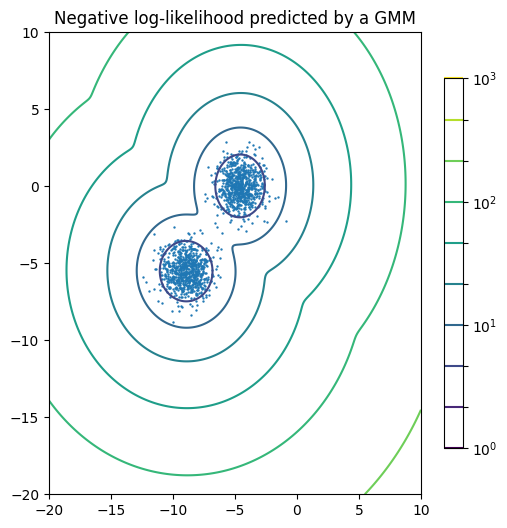

In [114]:
#clustering distribution models-gaussian mixture models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
 
np.random.seed(170)

x_train,y_train=make_blobs(n_samples=1500,centers=2)

clf=GaussianMixture(n_components=2,covariance_type='full').fit(x_train)

x=np.linspace(-20,10,1000)
y=np.linspace(-20,10,1000)
X,Y=np.meshgrid(x,y)
XX=np.array([X.ravel(),Y.ravel()]).T#
Z=-clf.score_samples(XX)#
Z=Z.reshape(X.shape)

plt.figure(figsize=(6,6))
CS=plt.contour(X,Y,Z,norm=LogNorm(vmin=1,vmax=1000),levels=np.logspace(0,3,10))
CB=plt.colorbar(shrink=.8,extend='both')
plt.scatter(x_train[:,0],x_train[:,1],.5)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')

In [51]:
x.shape

(1000,)

In [52]:
y.shape

(1000,)

In [53]:
X.ravel().shape

(1000000,)

In [54]:
X.shape

(1000, 1000)

In [55]:
Y.shape

(1000, 1000)

In [56]:
XX.shape

(1000000, 2)

In [57]:
clf.score_samples(XX).shape

(1000000,)

In [58]:
Z.shape

(1000, 1000)

In [65]:
Z[0,0]

122.47775646330398

In [75]:
np.logspace(0,3,10)


array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])

<Axes: ylabel='Count'>

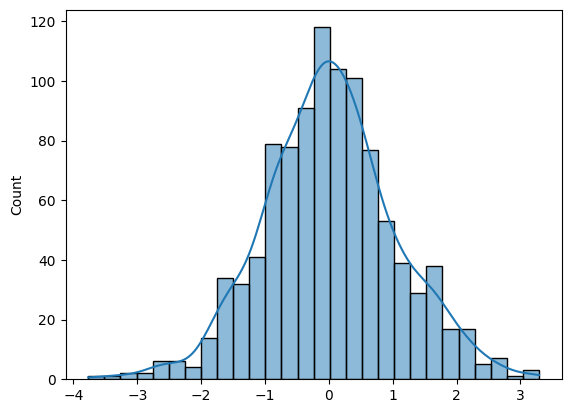

In [155]:
import seaborn as sb

sb.histplot(np.random.normal(0,1,1000),kde=True)

<Axes: ylabel='Count'>

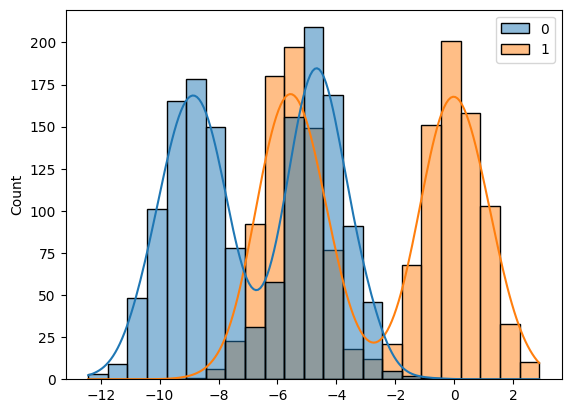

In [160]:
sb.histplot(x_train[:,:],kde=True)

(-20.0, 30.0, -20.0, 40.0)

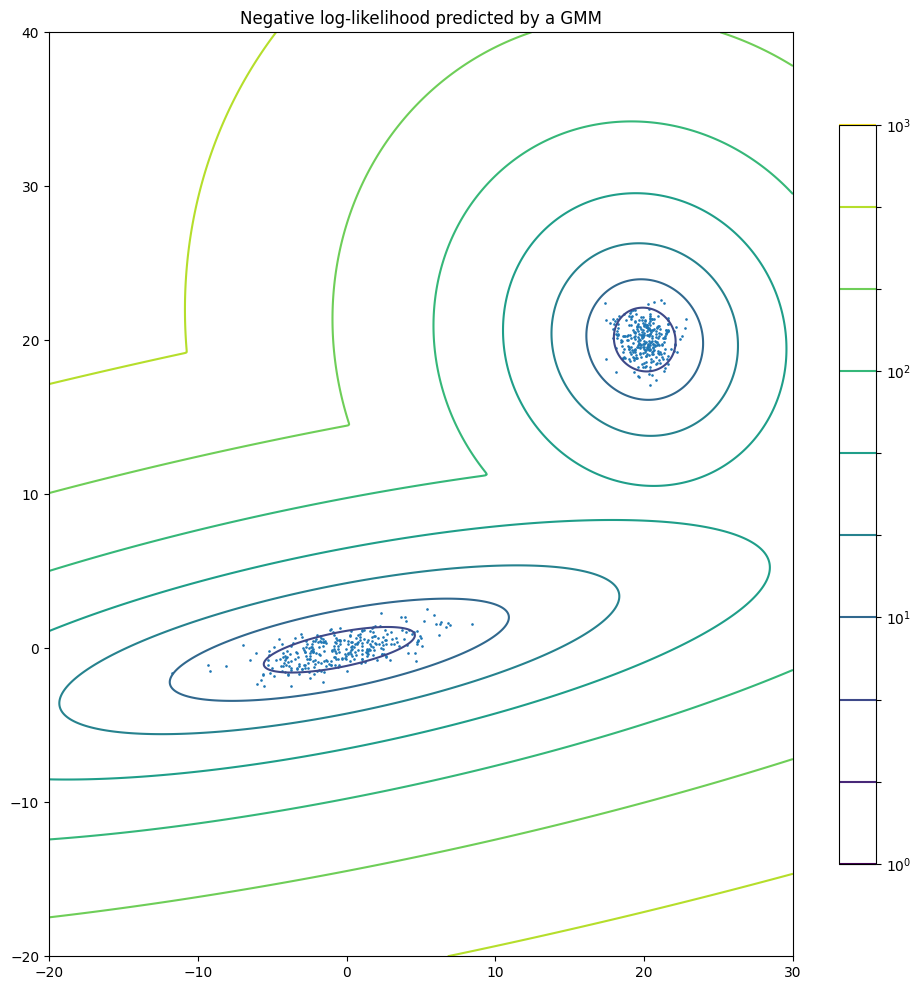

In [208]:
#calculate the density estimation of a mixture of two gaussians 
#with different centers and covariance matricies.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

np.random.seed(170)
n_samples=300

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

#fit gaussian mixture model with two components
clf=GaussianMixture(n_components=2,covariance_type='full').fit(X_train)#####################33333

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.,1000)
y = np.linspace(-20., 40.,1000)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
#Z=clf.predict(XX)
Z = Z.reshape(X.shape)

plt.figure(figsize=(12, 12))
CS = plt.contour(X, Y, Z,levels=np.logspace(0, 3, 10) ,norm=LogNorm(vmin=1.0, vmax=1000.0),)

CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')





In [165]:
shifted_gaussian.shape

(300, 2)

In [167]:
stretched_gaussian.shape

(300, 2)

In [169]:
X_train.shape

(600, 2)

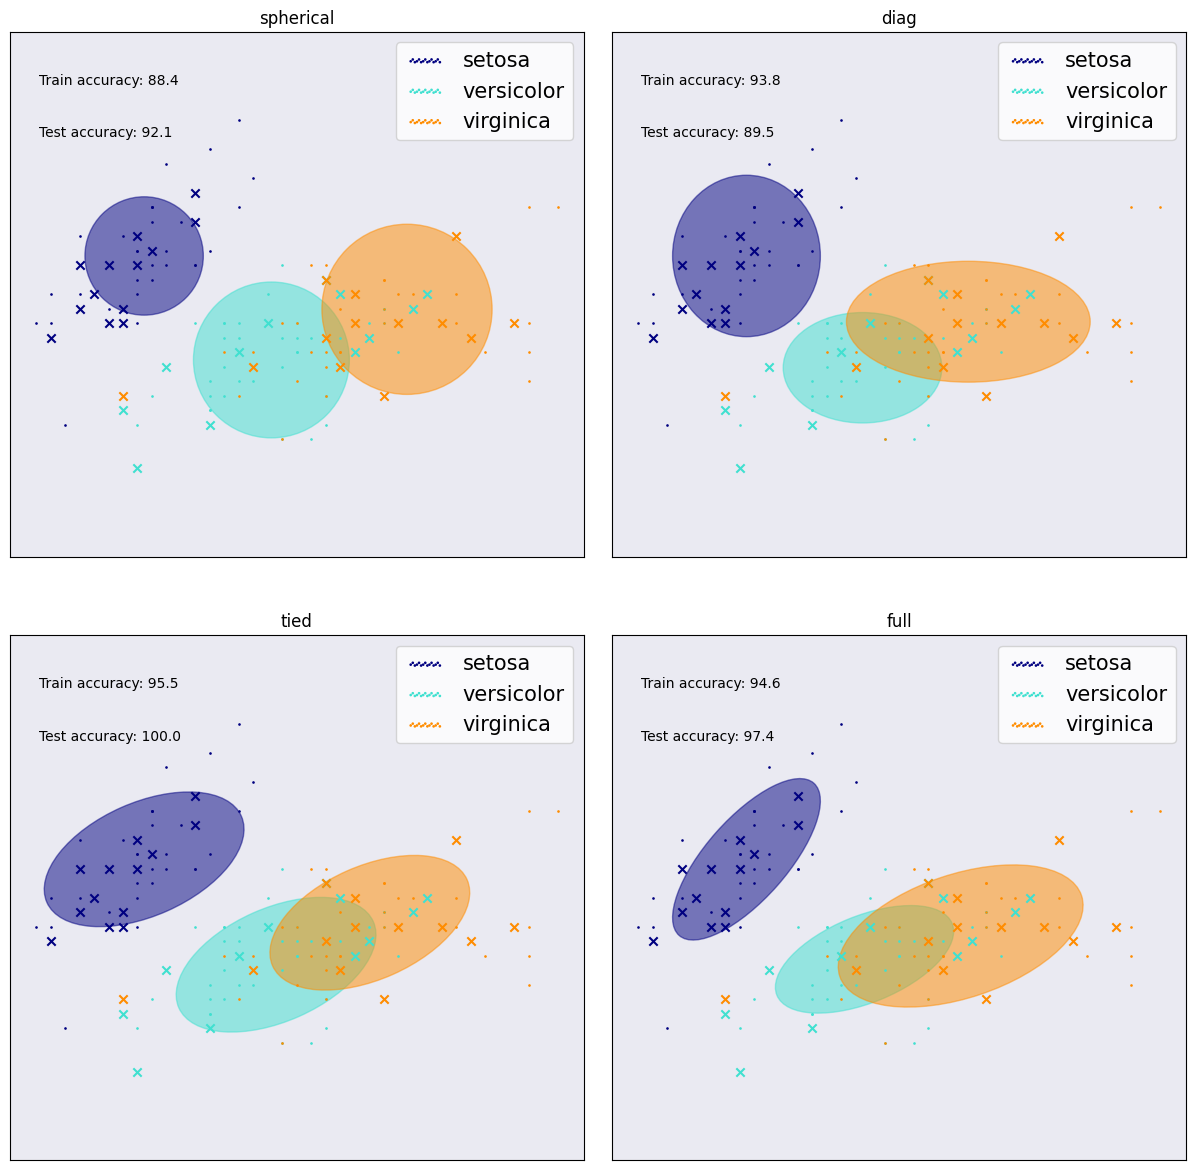

In [388]:
import matplotlib as mpl

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

colors = ['navy', 'turquoise', 'darkorange']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],angle= angle+180,color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,############33333333333333
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

scaling = 2
plt.figure(figsize=(scaling * 3 * n_estimators // 2, scaling * 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05, left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)


    h = plt.subplot(2, 2, index + 1)
    h.set_facecolor('#eaeaf2')
    make_ellipses(estimator, h)
    
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,label=iris.target_names[n])
        
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

    plt.legend(scatterpoints=15, loc='upper right',fontsize=15)

plt.show()

In [277]:
#gmm.covariances

In [278]:
train_index.shape

(112,)

In [279]:
test_index.shape

(38,)

In [280]:
X_train.shape

(112, 4)

In [281]:
Y_train.shape

(112,)

In [282]:
Y_test.shape

(38,)

In [315]:
n_classes

3

In [314]:
(estimators)

['full', 'tied', 'diag', 'spherical']

In [299]:
10//3

3

In [320]:
estimators.items()

dict_items([('full', GaussianMixture(max_iter=10, n_components=3)), ('tied', GaussianMixture(covariance_type='tied', max_iter=10, n_components=3)), ('diag', GaussianMixture(covariance_type='diag', max_iter=10, n_components=3)), ('spherical', GaussianMixture(covariance_type='spherical', max_iter=10, n_components=3))])

In [325]:
estimator.means_init

array([[5.04594595, 3.46486486, 1.46216216, 0.25945946],
       [5.91842105, 2.75789474, 4.25263158, 1.31578947],
       [6.59459459, 2.98378378, 5.51351351, 2.02432432]])

In [ ]:
estimator.means_[0,:2]

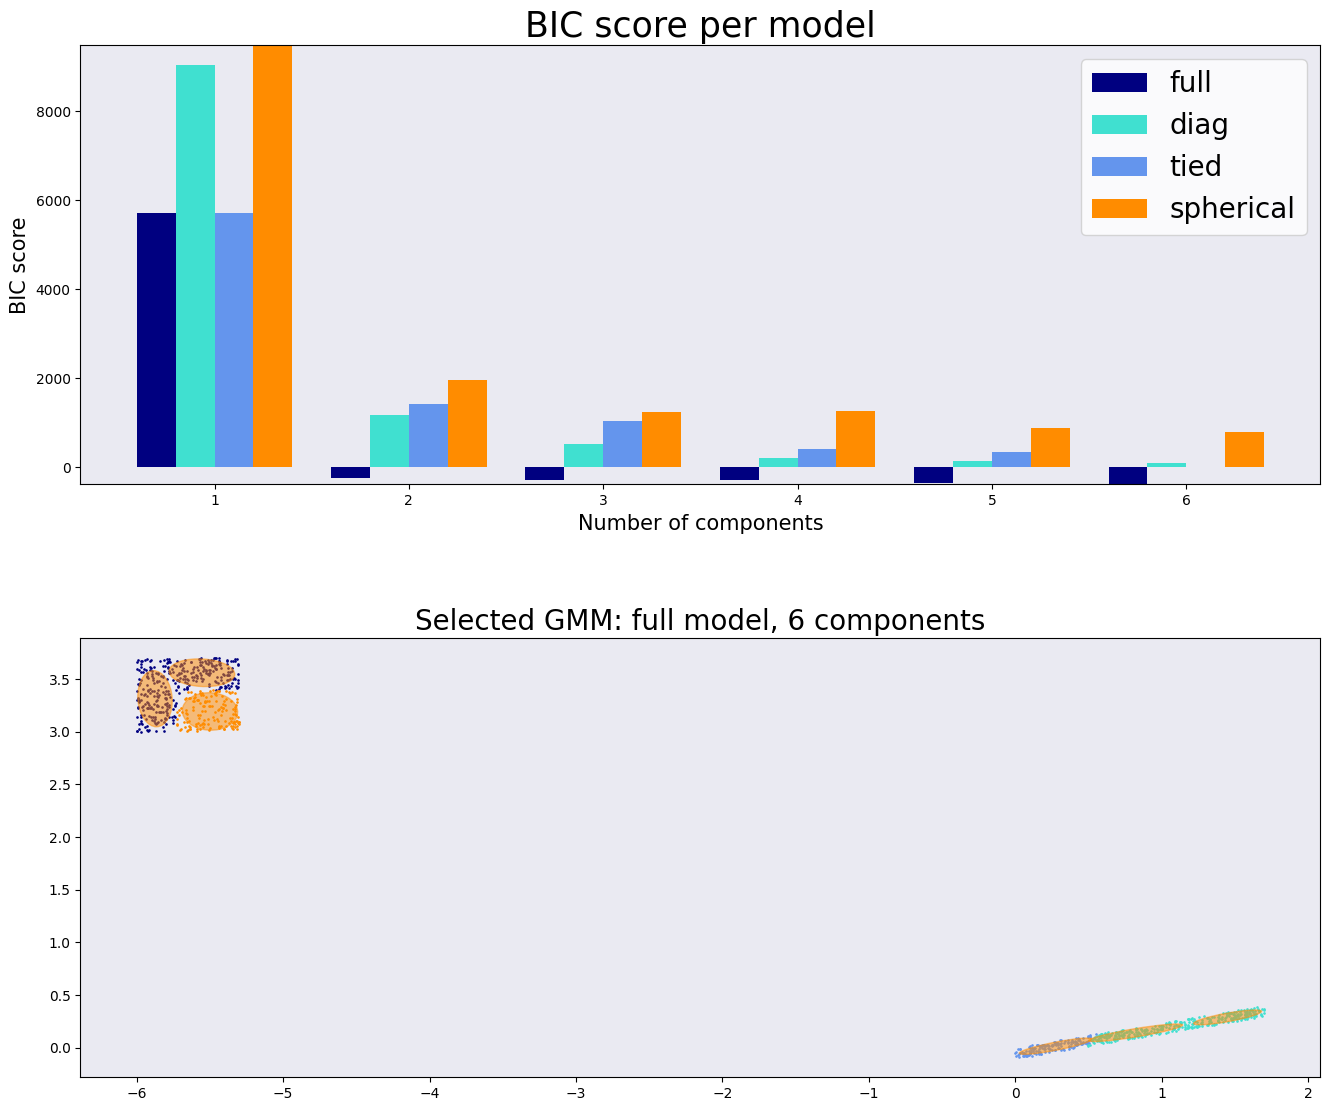

In [319]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import mixture

from scipy import linalg
import itertools

np.random.seed(0)

# Number of samples per component
n_samples = 500

c=np.array([[0, -0.1], [1.7,.4]])
x=np.r_[np.dot(np.random.rand(n_samples,2),c),#################3333333333333
       0.7 * np.random.rand(n_samples,2) + np.array([-6,3]) ]

lowest_bic=np.infty
bic=[]
n_components_range=range(1,7)
cov_types=['full','diag','tied','spherical']

for cov_type in cov_types:
    for n_component in n_components_range:
        #fit a gaussian mixture model with EM
        gmm=mixture.GaussianMixture(n_components=n_component,covariance_type=cov_type).fit(x)###########333333
        bic.append(gmm.bic(x))
        if bic[-1] < lowest_bic:
            lowest_bic=bic[-1]
            best_gmm=gmm

bic=np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
clf=best_gmm
bars=[]

#plot the BIC scores
scaling=2
plt.figure(figsize=(8 * scaling, 6 * scaling))############################3
splot1=plt.subplot(2,1,1)
splot1.set_facecolor('#eaeaf2')

bic_pos=0
for i,(cov_type,col) in enumerate(zip(cov_types,color_iter)):
    xpos=1  + i*.2 -.30 #to prevent overlapping the bars
    for n_component in n_components_range:
        bars.append(plt.bar(xpos,bic[bic_pos],width=.2,color=col,label=cov_type))
        xpos+=1
        bic_pos+=1

    #xpos=np.array(n_components_range) + .2 * (i - 2)#
    #bars.append(plt.bar(xpos,bic[ i*len(n_components_range) : (i+1)*len(n_components_range) ], width=.2,color=color))

plt.xticks(n_components_range)   
plt.ylim(bic.min(),bic.max()) 

plt.title('BIC score per model',fontsize=25)
plt.xlabel('Number of components',fontsize=15)
plt.ylabel('BIC score',fontsize=15)
plt.legend(bars[::6],cov_types,fontsize=20)

#plot the winner
splot2=plt.subplot(2,1,2)######################################33333
splot2.set_facecolor('#eaeaf2')
#splot2.grid(lw=1.5,c='w')

y_pred=clf.predict(x)

for i,(mean,cov,col) in enumerate(zip(clf.means_,clf.covariances_,color_iter)):
    v,w=linalg.eigh(cov)
    
    if not np.any(y_pred==i):#if there is no points to plot,go next step
        continue
        
    plt.scatter(x[y_pred==i,0],x[y_pred==i,1],.8,c=col)
    
    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1],angle= (180. + angle), color=color)
    ell.set_clip_box(splot2.bbox)
    ell.set_alpha(.5)
    splot2.add_artist(ell)

    
plt.title('Selected GMM: %s model, %s components'%(best_gmm.covariance_type,best_gmm.n_components),fontsize=20)
plt.subplots_adjust(hspace=.35, bottom=.02)


In [26]:
x.shape

(1000, 2)

In [27]:
np.infty == np.inf

True

In [28]:
len(bic)

24

In [279]:
best_gmm.covariance_type

'full'

In [280]:
best_gmm.n_components

3

In [35]:
lowest_bic

177.9155745526321

In [40]:
best_gmm.lower_bound_

-0.030426102467689262

In [42]:
type(bic)

list

In [57]:
(n_components_range)

range(1, 7)

In [58]:
np.array(n_components_range)

array([1, 2, 3, 4, 5, 6])

In [121]:
xpos

7

In [122]:
bic_pos

24

In [125]:
len(bars)

24

In [240]:
set(y_pred)

{0, 1, 2}

In [222]:
clf.means_

array([[6.35438767, 3.34492257],
       [2.208051  , 0.83338285],
       [0.85362861, 0.29211775]])

In [226]:
(clf.covariances_)

array([[[ 0.03962122, -0.00193181],
        [-0.00193181,  0.04002227]],

       [[ 0.21527925,  0.08508607],
        [ 0.08508607,  0.03448284]],

       [[ 0.24222596,  0.09407828],
        [ 0.09407828,  0.03736815]]])

In [229]:
linalg.eigh(clf.covariances_[0])

(array([0.03787955, 0.04176394]),
 array([[-0.74271338, -0.66960946],
        [-0.66960946,  0.74271338]]))

In [230]:
clf.covariances_[0]

array([[ 0.03962122, -0.00193181],
       [-0.00193181,  0.04002227]])

In [232]:
w

array([0.00072008, 0.27887402])

In [233]:
v

array([[ 0.36298019, -0.93179686],
       [-0.93179686, -0.36298019]])

In [241]:
not np.any(np.arange(1,11)==0)

True

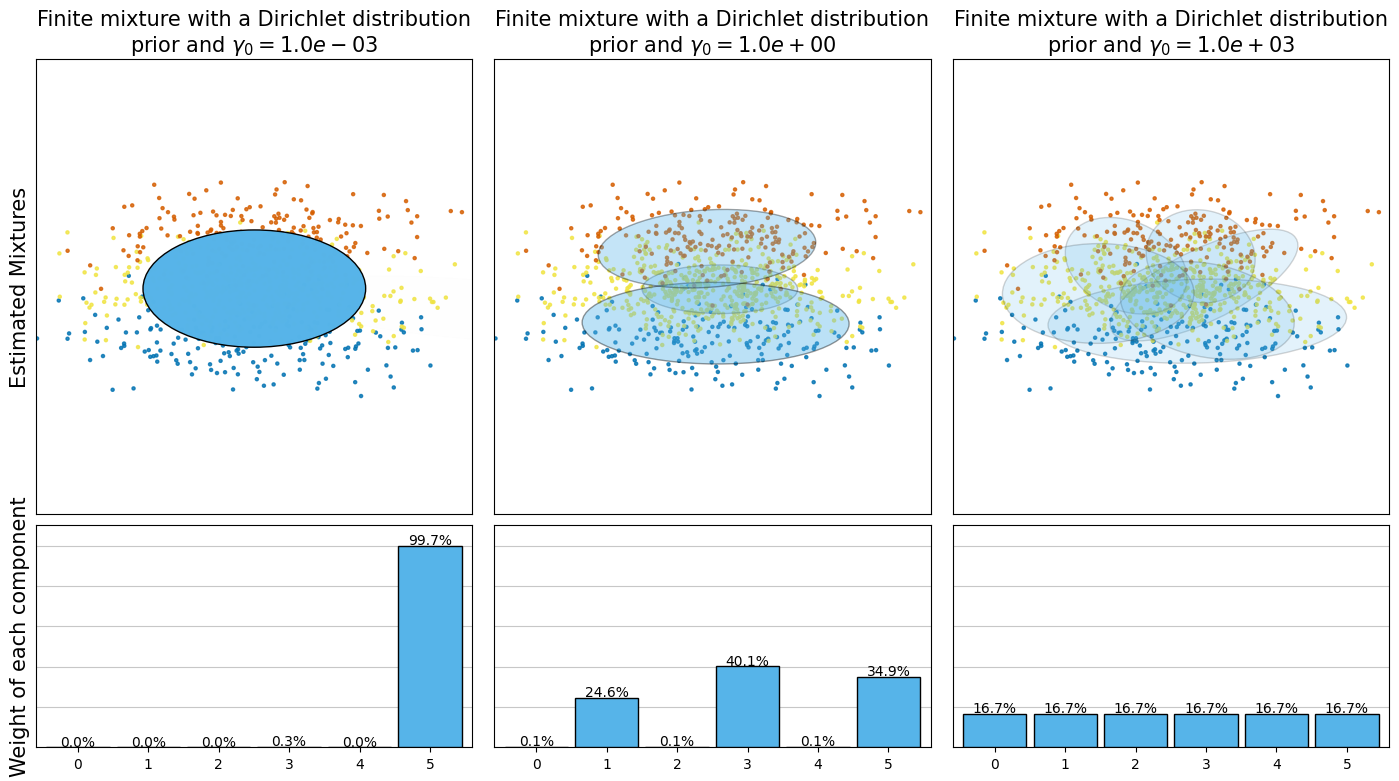

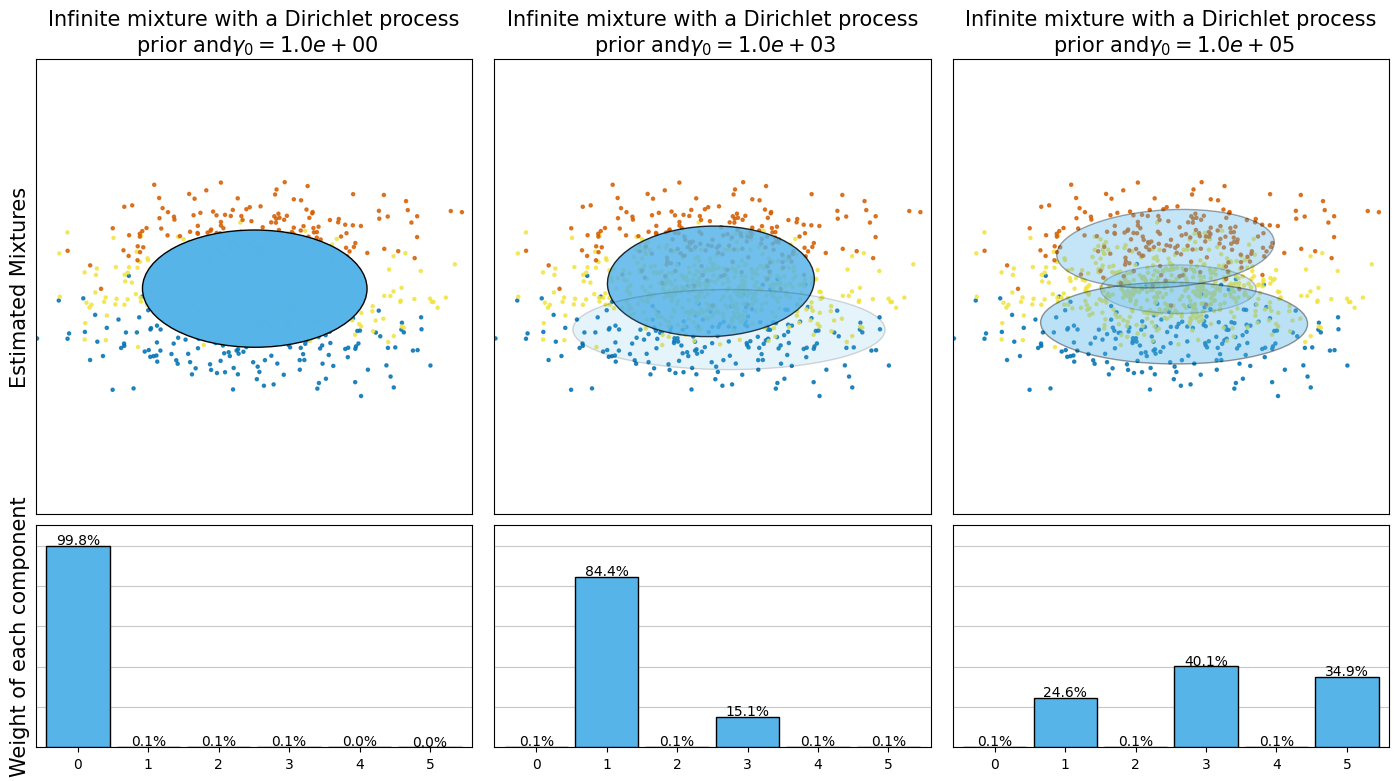

In [408]:
#Variational Bayesian Gaussian Mixture

import numpy as np
import matplotlib as mpl
import matplotlib.gridspec as gridspec

from sklearn.mixture import BayesianGaussianMixture


def plot_ellipses(ax, weights, means, covars):
    for n in range(means.shape[0]):
        eig_vals, eig_vecs = np.linalg.eigh(covars[n])
        unit_eig_vec = eig_vecs[0] / np.linalg.norm(eig_vecs[0])
        angle = np.arctan2(unit_eig_vec[1], unit_eig_vec[0])
        # Ellipse needs degrees
        angle = 180 * angle / np.pi
        # eigenvector normalization
        eig_vals = 2 * np.sqrt(2) * np.sqrt(eig_vals)
        ell = mpl.patches.Ellipse(means[n], eig_vals[0], eig_vals[1],
                                  angle=(180 + angle), edgecolor='black')
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(weights[n])
        ell.set_facecolor('#56B4E9')
        ax.add_artist(ell)

        
def plot_results(ax1, ax2, estimator, X, y, title, plot_title=False):
    ax1.set_title(title,fontsize=15)
    ax1.scatter(X[:, 0], X[:, 1], s=5, marker='o', color=colors[y], alpha=0.8)
    ax1.set_xlim(-2., 2.)
    ax1.set_ylim(-3., 3.)
    ax1.set_xticks(())
    ax1.set_yticks(())
    plot_ellipses(ax1, estimator.weights_, estimator.means_,
                  estimator.covariances_)

    ax2.get_xaxis().set_tick_params(direction='out')
    ax2.yaxis.grid(True, alpha=0.7)
    for k, w in enumerate(estimator.weights_):
        ax2.bar(k, w, width=0.9, color='#56B4E9', zorder=3,
                align='center', edgecolor='black')
        ax2.text(k, w + 0.007, "%.1f%%" % (w * 100.),
                 horizontalalignment='center')
    ax2.set_xlim(-.6, 2 * n_components - .4)
    ax2.set_ylim(0., 1.1)
    ax2.tick_params(axis='y', which='both', left=False,right=False, labelleft=False)
    ax2.tick_params(axis='x', which='both', top=False)

    if plot_title:
        ax1.set_ylabel('Estimated Mixtures',fontsize=15)
        ax2.set_ylabel('Weight of each component',fontsize=15)

        
# Parameters of the dataset
random_state, n_components, n_features = 2, 3, 2

colors = np.array(['#0072B2', '#F0E442', '#D55E00'])

covars = np.array([[[.7, .0], [.0, .1]],
                   [[.5, .0], [.0, .1]],
                   [[.5, .0], [.0, .1]]])

samples = np.array([200, 500, 200])

means = np.array([[.0, -.70],
                  [.0, .0],
                  [.0, .70]])

# mean_precision_prior= 0.8 to minimize the influence of the prior
estimators =[
    ("Finite mixture with a Dirichlet distribution\nprior and "r"$\gamma_0=$",###########3333333333333333
     BayesianGaussianMixture(weight_concentration_prior_type="dirichlet_distribution",
     n_components=2 * n_components, reg_covar=0, init_params='random',max_iter=1500, 
     mean_precision_prior=.8,random_state=random_state), 
     [.001, 1, 1000]),################
    
     ("Infinite mixture with a Dirichlet process\n prior and" r"$\gamma_0=$",
     BayesianGaussianMixture(weight_concentration_prior_type="dirichlet_process",
     n_components=2 * n_components, reg_covar=0, init_params='random',max_iter=1500, 
     mean_precision_prior=.8,random_state=random_state),
     [1, 1000, 100000])]###############
    
# Generate data
rng = np.random.RandomState(random_state)

X = np.vstack([
    rng.multivariate_normal(means[j], covars[j], samples[j])
    for j in range(n_components)])#n_components=3

y = np.concatenate([np.full(samples[j], j, dtype=int)
                    for j in range(n_components)])

# Plot results in two different figures
for (title, estimator, concentrations_prior) in estimators:
    
    plt.figure(figsize=(4.7 * 3, 8))
    plt.subplots_adjust(bottom=.04, top=0.90, hspace=.05, wspace=.05, left=.03, right=.99)

    gs = gridspec.GridSpec(3, len(concentrations_prior))
    
    for k, concentration in enumerate(concentrations_prior):
        
        estimator.weight_concentration_prior = concentration##########################3333333333333333333
        estimator.fit(X)
        plot_results(plt.subplot(gs[0:2, k]), plt.subplot(gs[2, k]), estimator,
                     X, y, r"%s$%.1e$" % (title, concentration),plot_title=k == 0)

In [327]:
X.shape

(900, 2)

In [329]:
y.shape

(900,)

In [352]:
estimator.weight_concentration_prior

100000

In [347]:
estimator.weight_concentration_prior_

100000

In [345]:
concentrations_prior

[1, 1000, 100000]

In [346]:
concentration

100000

In [355]:
estimator.weights_

array([0.00116732, 0.24626756, 0.00116729, 0.40121143, 0.00116727,
       0.34901914])

In [356]:
estimator.weight_concentration_

(array([  1.05755664, 223.11352066,   1.05755517, 363.49681553,
          1.05755369, 316.21699831]),
 array([100899.94244336, 100677.8289227 , 100677.77136753, 100315.274552  ,
        100315.21699831, 100000.        ]))

In [357]:
estimator.n_components

6

/home/mohammad-hossein-abedi/Documents/Code/Packtpub_ML_Training/lib/python3.12/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


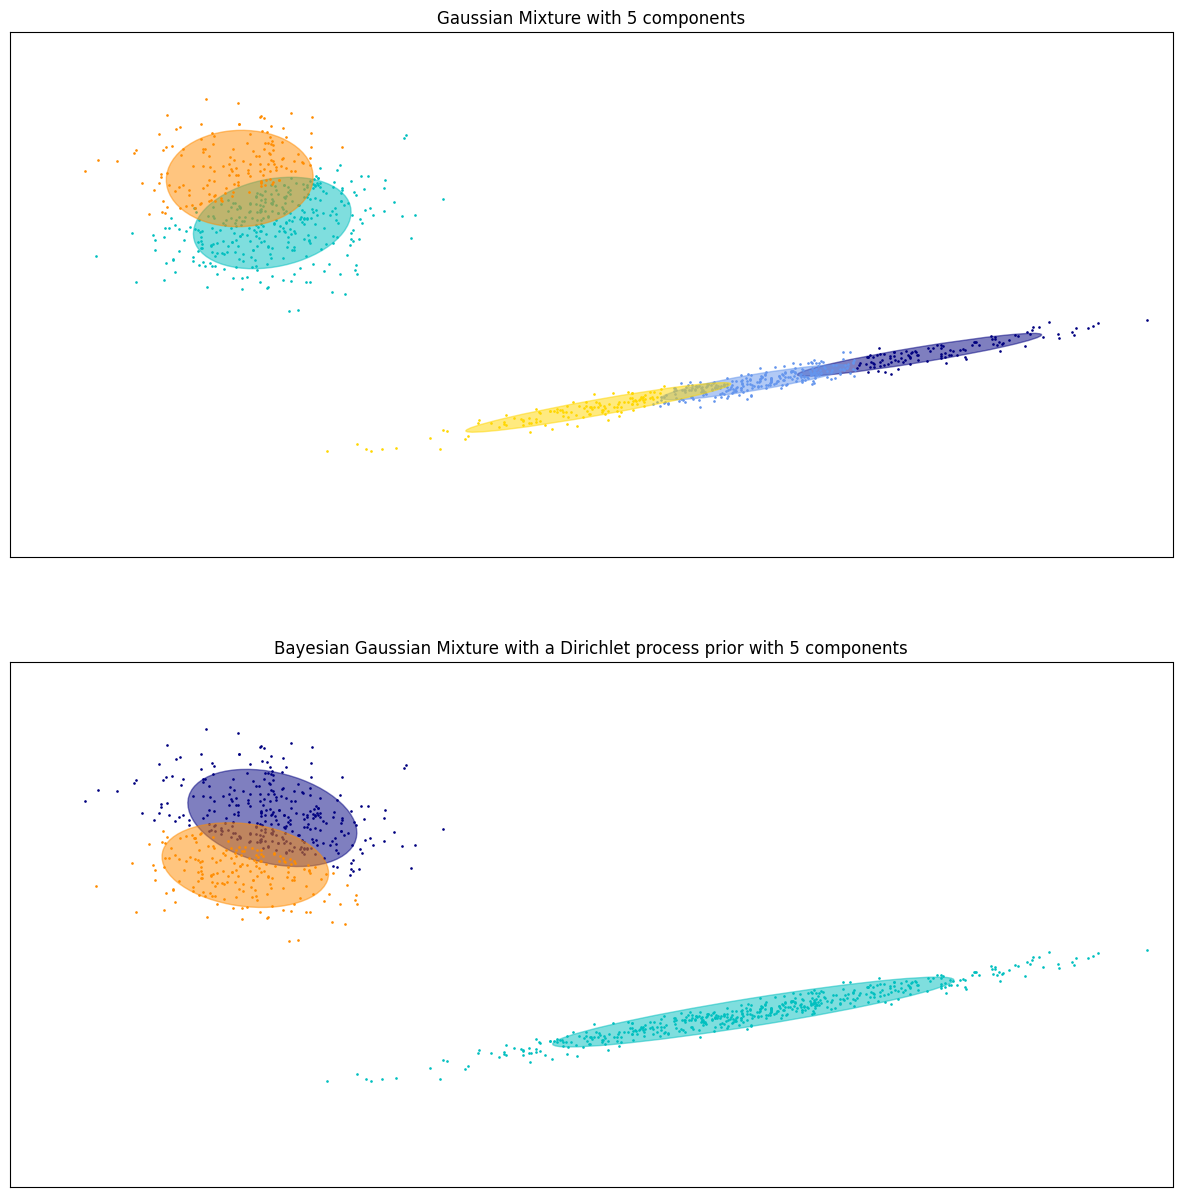

In [369]:
#compare Gaussian mixture models with a fixed number of components, 
#to the variational Gaussian mixture models with a Dirichlet process prior.

import itertools
from scipy import linalg
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold','darkorange'])

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip( means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1],angle=( 180. + angle), color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X)#########################33333
plt.figure(figsize=(15, 15))
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture with %d components'%gmm.n_components)

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=5, covariance_type='full').fit(X)################
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior with %d components'%dpgmm.n_components)


In [375]:
gmm.weights_

array([0.12618371, 0.3176944 , 0.23678904, 0.13702725, 0.1823056 ])

In [378]:
dpgmm.weights_

array([0.29753719, 0.49978116, 0.00101179, 0.00100673, 0.20066314])

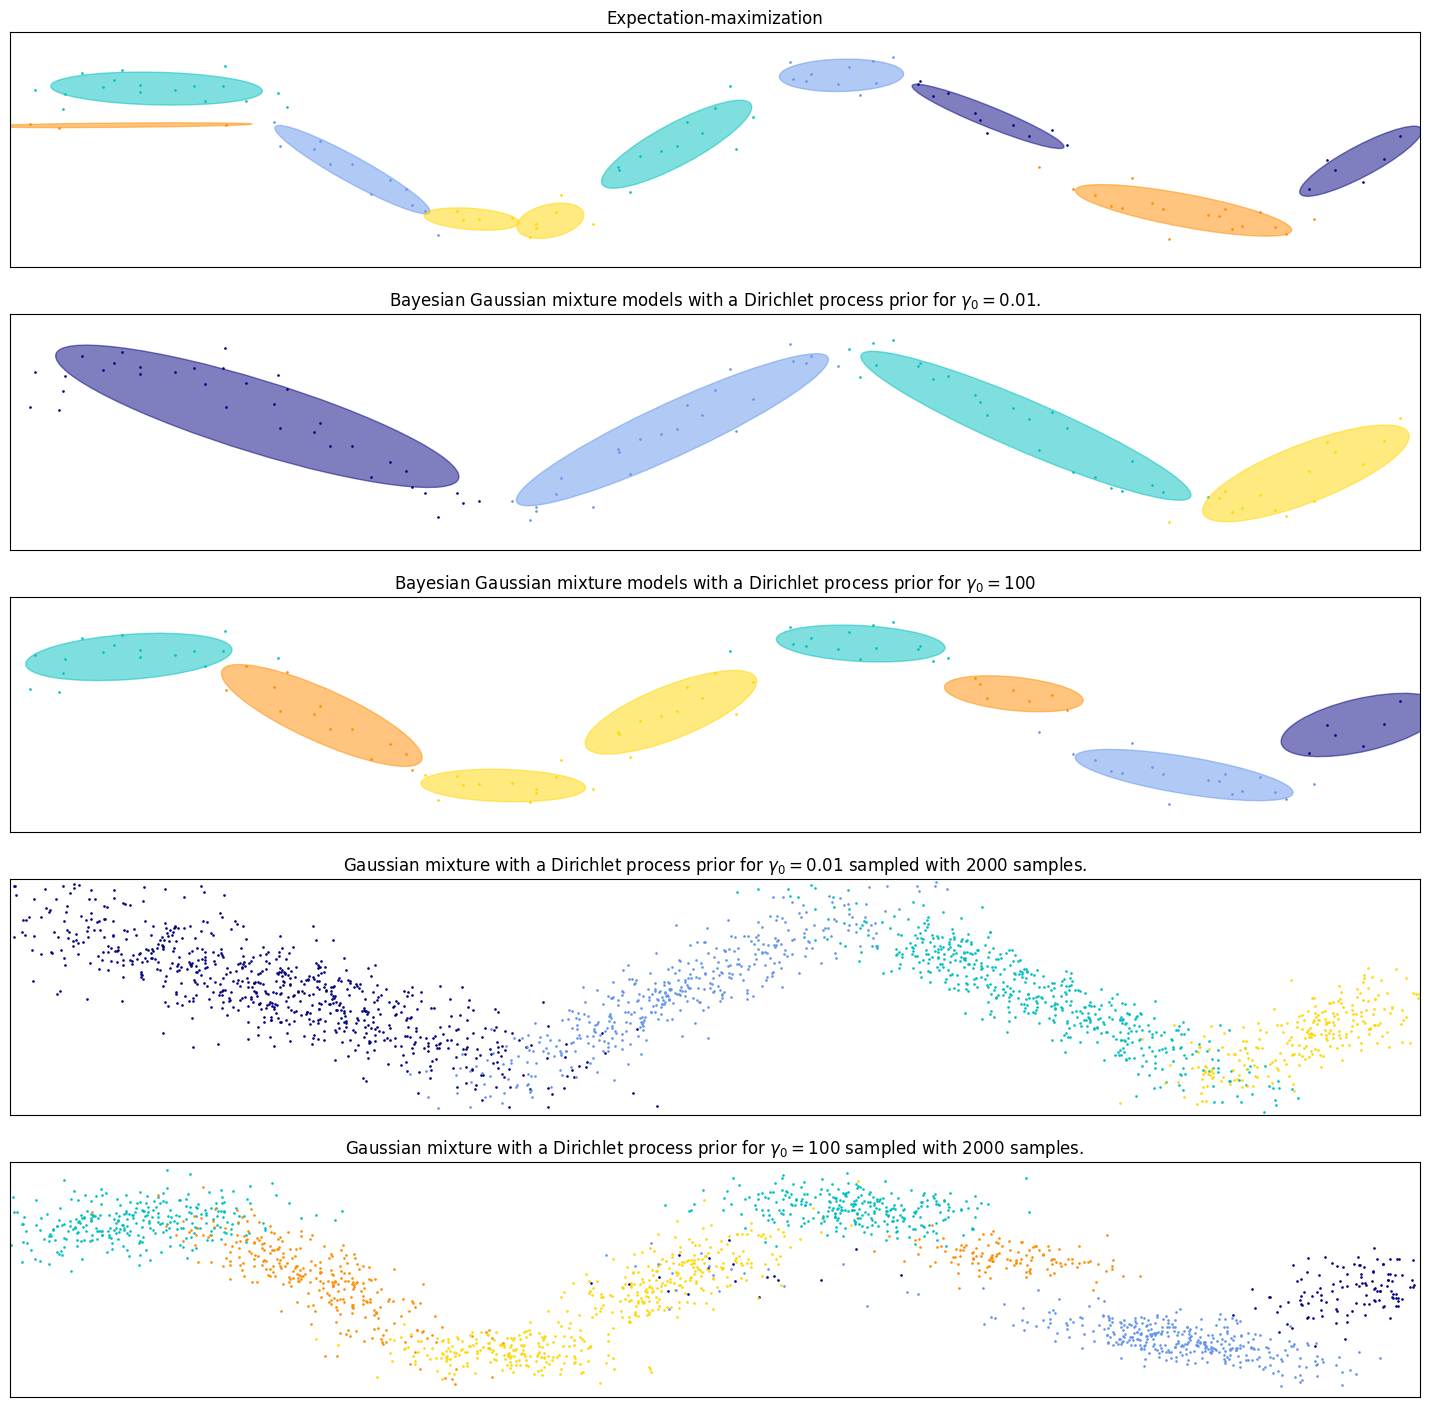

In [382]:
# Gaussian Mixture Model Sine Curve

import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y, means, covariances, index, title):
    splot = plt.subplot(5, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1],angle=( 180. + angle), color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-6., 4. * np.pi - 6.)
    plt.ylim(-5., 5.)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())


def plot_samples(X, Y, n_components, index, title):
    plt.subplot(5, 1, 4 + index)
    for i, color in zip(range(n_components), color_iter):
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)

    plt.xlim(-6., 4. * np.pi - 6.)
    plt.ylim(-5., 5.)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())


# Parameters
n_samples = 100

# Generate random sample following a sine curve
np.random.seed(0)
X = np.zeros((n_samples, 2))
step = 4. * np.pi / n_samples

for i in range(X.shape[0]):
    x = i * step - 6.
    X[i, 0] = x + np.random.normal(0, 0.1)
    X[i, 1] = 3. * (np.sin(x) + np.random.normal(0, .2))

plt.figure(figsize=(15, 15))
plt.subplots_adjust(bottom=.04, top=0.95, hspace=.2, wspace=.05,
                    left=.03, right=.97)

# Fit a Gaussian mixture with EM using ten components
gmm = mixture.GaussianMixture(n_components=10, covariance_type='full',
                              max_iter=100).fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Expectation-maximization')

dpgmm = mixture.BayesianGaussianMixture(
    n_components=10, covariance_type='full', weight_concentration_prior=1e-2,
    weight_concentration_prior_type='dirichlet_process',
    mean_precision_prior=1e-2, covariance_prior=1e0 * np.eye(2),
    init_params="random", max_iter=100, random_state=2).fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,################################333
             "Bayesian Gaussian mixture models with a Dirichlet process prior "
             r"for $\gamma_0=0.01$.")

X_s, y_s = dpgmm.sample(n_samples=2000)########################3333333333333
plot_samples(X_s, y_s, dpgmm.n_components, 0,
             "Gaussian mixture with a Dirichlet process prior "
             r"for $\gamma_0=0.01$ sampled with $2000$ samples.")

dpgmm = mixture.BayesianGaussianMixture(
    n_components=10, covariance_type='full', weight_concentration_prior=1e+2,
    weight_concentration_prior_type='dirichlet_process',
    mean_precision_prior=1e-2, covariance_prior=1e0 * np.eye(2),
    init_params="kmeans", max_iter=100, random_state=2).fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 2,
             "Bayesian Gaussian mixture models with a Dirichlet process prior "
             r"for $\gamma_0=100$")

X_s, y_s = dpgmm.sample(n_samples=2000)
plot_samples(X_s, y_s, dpgmm.n_components, 1,
             "Gaussian mixture with a Dirichlet process prior "
             r"for $\gamma_0=100$ sampled with $2000$ samples.")

plt.show()

In [389]:
X.shape

(100, 2)

In [392]:
dpgmm.predict(X).shape

(100,)

In [387]:
X_s.shape

(2000, 2)

In [393]:
y_s.shape

(2000,)

In [396]:
gmm.n_components

10

In [398]:
gmm.weights_

array([0.07253972, 0.16641465, 0.10537   , 0.0525637 , 0.17560017,
       0.10714166, 0.12473554, 0.11182453, 0.05138523, 0.0324248 ])

In [395]:
dpgmm.n_components

10

In [399]:
dpgmm.weights_

array([0.00932968, 0.15910023, 0.17361972, 0.12582092, 0.13929601,
       0.07348008, 0.13715671, 0.00890942, 0.10218547, 0.07110175])

In [403]:
dpgmm.weight_concentration_prior_

100.0